<a href="https://colab.research.google.com/github/rayrahmaa/Air-Quality-Dataset-Data-Analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rahayu Nur Rahmawati
- **Email:** hyrahmaaa@gmail.com
- **ID Dicoding:** rahayu_nr16

## Menentukan Pertanyaan Bisnis

**LATAR BELAKANG :**

Beijing dikenal sebagai salah satu kota dengan tingkat polusi udara tinggi di dunia, terutama pada awal dekade 2010-an. Fenomena smog yang parah menjadi perhatian global karena dampaknya terhadap kesehatan masyarakat dan aktivitas ekonomi. Sebagai respons terhadap kondisi tersebut, pemerintah Tiongkok mulai menerapkan berbagai kebijakan pengendalian emisi sejak tahun 2013 untuk menurunkan tingkat polusi udara, khususnya partikel halus PM2.5.

Evaluasi efektivitas kebijakan tersebut menjadi penting untuk mengetahui apakah terdapat perbaikan kualitas udara dalam beberapa tahun setelah implementasi kebijakan. Selain itu, faktor meteorologi seperti suhu, curah hujan, dan kecepatan angin juga diketahui memengaruhi konsentrasi polutan di atmosfer dan dapat memperburuk atau mengurangi kondisi smog.

Dengan menggunakan data kualitas udara dari 12 stasiun pemantauan di Beijing selama periode 2013 - 2017, analisis ini bertujuan untuk mengevaluasi tren polusi udara, mengidentifikasi pola musiman smog, serta memahami hubungan antara faktor cuaca dan konsentrasi polutan utama.

**PERTANYAAN BISNIS :**



*   Bagaimana tren perubahan konsentrasi PM2.5 di Beijing sejak penerapan kebijakan pengendalian emisi pada tahun 2013?

*   Kapan periode dengan tingkat smog tertinggi terjadi, dan apakah terdapat pola musiman yang konsisten?

*   Sejauh mana kondisi meteorologi berhubungan dengan tingkat konsentrasi PM2.5?

*   Bagaimana perbedaan tingkat polusi udara antar wilayah (station) di Beijing?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import pearsonr
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/DICODING"
os.listdir(data_path)

['PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'notebook.ipynb']

In [ ]:
all_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

df_list = []

for file in all_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

df_air = pd.concat(df_list, ignore_index=True)

df_air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.000000,4.000000,3.000000,NaN,200.000000,82.000000,-2.300000,1020.800000,-19.700000,0.000000,E,0.500000,Dingling
1,2,2013,3,1,1,7.000000,7.000000,3.000000,NaN,200.000000,80.000000,-2.500000,1021.300000,-19.000000,0.000000,ENE,0.700000,Dingling
2,3,2013,3,1,2,5.000000,5.000000,3.000000,2.000000,200.000000,79.000000,-3.000000,1021.300000,-19.900000,0.000000,ENE,0.200000,Dingling
3,4,2013,3,1,3,6.000000,6.000000,3.000000,NaN,200.000000,79.000000,-3.600000,1021.800000,-19.100000,0.000000,NNE,1.000000,Dingling
4,5,2013,3,1,4,5.000000,5.000000,3.000000,NaN,200.000000,81.000000,-3.500000,1022.300000,-19.400000,0.000000,N,2.100000,Dingling


In [ ]:
num_unique_stations = df_air['station'].nunique()
print(f"Jumlah stasiun unik: {num_unique_stations}")

rows_per_station = df_air.groupby('station')['No'].count().unique()
print(f"Jumlah baris per stasiun: {rows_per_station}")

Jumlah stasiun unik: 12
Jumlah baris per stasiun: [35064]


In [ ]:
df_air.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Insight:**
Struktur data menunjukkan bahwa:

*   Variabel `No` menunjukkan jumlah observasi data, setiap `station` terdiri dari 35.064 data.
*   Dataset bersifat time-series hourly, karena terdapat variabel `year`,`month`, `day`, dan `hour`.
*   Variabel polutan utama meliputi `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, dan `O3`.
*   Dataset juga mencakup variabel meteorologi seperti `TEMP`, `PRES`, `DEWP`, `RAIN`, `WSPM`, dan `wd`.
*   Variabel `station` menunjukkan lokasi stasiun pemantauan.
*   Sekilas terdapat beberapa nilai yang terlihat kosong (NaN) yang mengindikasikan adanya missing values yang perlu ditangani pada tahap data cleaning.
*   Variabel waktu masih terpisah dan perlu dikonversi menjadi satu kolom datetime agar memudahkan analisis time-series.

### Assessing Data

**CEK TIPE DATA**

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


**Insight:**

*   Sebagian besar variabel polutan dan meteorologi bertipe numerik.
*   Variabel `wd` dan `station` bertipe object (kategorikal).
*   Variabel terkait waktu masih terpisah dan perlu digabung menjadi datetime.


**CEK MISSING VALUES**

In [ ]:
df_air.isna().sum().sort_values(ascending=False)

,0
CO,20701
O3,13277
NO2,12116
SO2,9021
PM2.5,8739
PM10,6449
wd,1822
DEWP,403
TEMP,398
PRES,393


**Insight:**

*   Missing values paling banyak terdapat pada variabel polutan dibanding variabel lainnya. Namun, masih di bawah 5% dari total observasi (420.768 baris), sehingga dataset secara umum masih dalam kondisi baik.
*   Missing value tertinggi pada variabel `CO` walau hanya sekitar 4.9% dari total data. Kemudian diikuti `O3` dan `NO2`.
*   Missing value pada variabel meteorologi relatif kecil yaitu kurang dari 1% total data.
*   Variabel waktu (`year`, `month`, `day`, `hour`) dan `station` lengkap, sehingga struktur time-series tetap utuh.

**CEK DUPLIKAT**

In [ ]:
df_air.duplicated().sum()

np.int64(0)

**Insight:**

Berdasarkan hasil pengecekan menggunakan df_air.duplicated().sum(), tidak ditemukan data duplikat (0 baris).

Hal ini menunjukkan bahwa setiap observasi bersifat unik dan tidak terdapat pencatatan ganda pada dataset. Dengan demikian, tidak diperlukan tindakan penghapusan duplikat pada tahap data cleaning.

**STATISTIK DESKRIPSI AWAL**

In [ ]:
df_air.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
df_air['datetime'] = pd.to_datetime(
    df_air[['year', 'month', 'day', 'hour']]
)

df_air = df_air.sort_values('datetime')
df_air['datetime'].diff().value_counts().head()

,count
datetime,
0 days 00:00:00,385704
0 days 01:00:00,35063


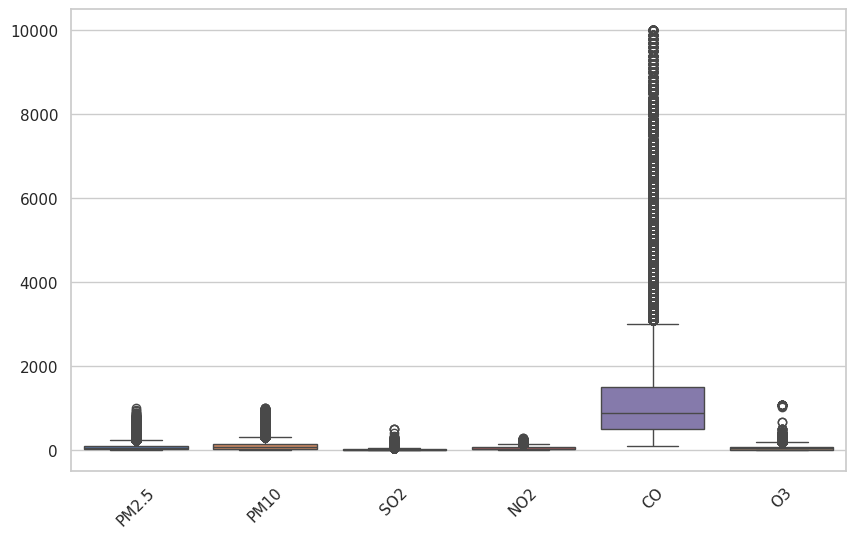

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_air[['PM2.5','PM10','SO2','NO2','CO','O3']])
plt.xticks(rotation=45)
plt.show()

**Insight:**

***Struktur Waktu***

*   Data mencakup periode tahun 2013 hingga 2017.
*   Data bersifat hourly (jam 0 - 23).
*   Distribusi waktu relatif (selisih terbesar hanya 1 jam) merata sepanjang periode pengamatan.

***Polutan Udara***

*   Rata-rata PM2.5 sebesar ±79.79 dengan nilai maksimum mencapai 999.
*   PM10 memiliki rata-rata ±104.60 dan maksimum 999.
*   CO memiliki nilai maksimum sangat tinggi hingga 10.000.
*   O3 memiliki nilai maksimum mencapai 1.071.
*   Nilai maksimum yang sangat tinggi pada beberapa variabel mengindikasikan kemungkinan adanya polusi ekstrem (smog berat) atau potensi outlier yang perlu diperiksa lebih lanjut
*   Visualisasi boxplot mengonfirmasi bahwa distribusi polutan tidak normal dan cenderung memiliki banyak nilai ekstrem. Hal ini menunjukkan karakteristik data polusi udara yang dinamis dan dipengaruhi oleh kejadian tertentu.

***Variabel Meteorologi***

*   Suhu (`TEMP`) berkisar antara -19.9 derajat hingga 41.6 derajat, yang masih masuk akal untuk kondisi iklim Beijing.
*   Curah hujan (`RAIN`) sebagian besar bernilai 0, menunjukkan banyak periode tanpa hujan.
*   Kecepatan angin (`WSPM`) berkisar antara 0 hingga 13.2.
*   Secara umum, variabel meteorologi berada dalam rentang yang realistis dan tidak menunjukkan anomali ekstrem.

**CEK KONSISTENSI JUMLAH DATA DAN RENTANG TAHUN PER `STATION`**

In [ ]:
df_air['station'].value_counts()

,count
station,
Dingling,35064
Aotizhongxin,35064
Shunyi,35064
Wanliu,35064
Nongzhanguan,35064
Huairou,35064
Changping,35064
Guanyuan,35064
Wanshouxigong,35064


In [ ]:
df_air.groupby('station')['year'].agg(['min','max'])

,min,max
station,,
Aotizhongxin,2013,2017
Changping,2013,2017
Dingling,2013,2017
Dongsi,2013,2017
Guanyuan,2013,2017
Gucheng,2013,2017
Huairou,2013,2017
Nongzhanguan,2013,2017
Shunyi,2013,2017


**Insight:**

*   Jumlah observasi antar stasiun relatif seimbang sehingga memungkinkan perbandingan yang adil antar wilayah.
*   Rentang waktu 2013 hingga 2017 menunjukkan konsistensi.



**CEK DISTRIBUSI POLUTAN (SKEWNESS AWAL)**

In [ ]:
df_air[['PM2.5','PM10','SO2','NO2','CO','O3']].skew()

,0
PM2.5,2.013975
PM10,1.885835
SO2,3.009503
NO2,1.050055
CO,2.570129
O3,1.660095


**Insight:**

Distribusi polutan cenderung right-skewed, menunjukkan adanya episode polusi ekstrem.

**CEK NILAI TIDAK MASUK AKAL**

In [ ]:
(df_air[['PM2.5','PM10','SO2','NO2','CO','O3']] < 0).sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0


**Insight:**

*   Data polutan berada dalam rentang yang logis secara ilmiah.
*   Tidak terdapat kesalahan pencatatan berupa nilai negatif pada konsentrasi polutan.
*   Dataset memiliki kualitas yang baik dari sisi validitas nilai numerik.

**CEK VARIABEL KATEGORIKAL**

In [ ]:
df_air['wd'].unique()

array(['E', 'NNW', 'NW', 'WNW', 'ENE', 'N', 'NNE', 'W', 'NE', 'SSW',
       'ESE', 'SE', 'S', 'SSE', 'SW', 'WSW', nan], dtype=object)

**Insight:**

*   Struktur kategori konsisten dan tidak ditemukan typo atau inkonsistensi penulisan.
*   Missing value pada wd perlu ditangani pada tahap data cleaning.

**CEK KORELASI AWAL**

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)
df_air.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.969533,0.043181,0.017764,0.000684,-0.023569,-0.044217,-0.226739,-0.046553,0.019660,-0.050868,-0.122409,0.188280,-0.101972,0.004877,0.054214
year,0.969533,1.000000,-0.202010,-0.005569,-0.000000,-0.025836,-0.037723,-0.170246,-0.056270,0.007861,-0.024384,-0.151791,0.186662,-0.164818,0.000975,0.087472
month,0.043181,-0.202010,1.000000,0.010522,-0.000000,0.010438,-0.025380,-0.213898,0.042293,0.046648,-0.103691,0.131323,-0.012795,0.265774,0.016066,-0.139666
day,0.017764,-0.005569,0.010522,1.000000,-0.000000,0.003428,0.026015,-0.005146,0.009878,-0.015692,0.002829,0.014390,0.021758,0.023070,-0.003699,-0.011646
hour,0.000684,-0.000000,-0.000000,-0.000000,1.000000,0.011709,0.051426,0.029947,-0.001559,-0.031358,0.282287,0.141983,-0.038367,-0.012216,0.012381,0.140486
PM2.5,-0.023569,-0.025836,0.010438,0.003428,0.011709,1.000000,0.884380,0.482354,0.666948,0.789998,-0.149697,-0.131127,0.018566,0.114656,-0.014359,-0.272205
PM10,-0.044217,-0.037723,-0.025380,0.026015,0.051426,0.884380,1.000000,0.462651,0.652193,0.702363,-0.111294,-0.096209,-0.017971,0.070310,-0.026519,-0.183665
SO2,-0.226739,-0.170246,-0.213898,-0.005146,0.029947,0.482354,0.462651,1.000000,0.499496,0.535750,-0.165341,-0.321799,0.223236,-0.266781,-0.040241,-0.108717
NO2,-0.046553,-0.056270,0.042293,0.009878,-0.001559,0.666948,0.652193,0.499496,1.000000,0.705500,-0.471587,-0.278192,0.174167,-0.031599,-0.043785,-0.400460
CO,0.019660,0.007861,0.046648,-0.015692,-0.031358,0.789998,0.702363,0.535750,0.705500,1.000000,-0.313012,-0.326237,0.188195,-0.057129,-0.013342,-0.297511


**Insight:**

Tingginya korelasi antara PM2.5 dan PM10 menunjukkan bahwa kedua variabel memiliki pola pergerakan yang serupa dan kemungkinan dipengaruhi oleh sumber emisi yang sama. Korelasi lainnya akan ditelusuri lebih lanjut ditahap berikutnya.

### Cleaning Data

**MELAKUKAN DROPPING LABEL NAMA YANG TIDAK DIGUNAKAN**

In [ ]:
df_air.drop('No', axis=1, inplace=True)

**MENGUBAH TIPE DATA**

Pada tahap sebelumnya terkait tipe data, dapat dilihat bahwa `station` dan `wd` bertipe object dan akan diubah dalam category.

In [ ]:
df_air['station'] = df_air['station'].astype('category')

In [ ]:
df_air['wd'] = df_air['wd'].astype('category')

**Insight:**

*   Lebih hemat memory
*   Secara logika memang kategorikal

Memastikan bahwa sebelumnya pada variabel polutan dan meteorologi banyak missing value, perlu ditegaskan bahwa ini bertipe float.

In [ ]:
df_air[['PM2.5','PM10','SO2','NO2','CO','O3']] = df_air[['PM2.5','PM10','SO2','NO2','CO','O3']].astype(float)

In [ ]:
df_air[['TEMP','PRES','DEWP','RAIN','WSPM']] = df_air[['TEMP','PRES','DEWP','RAIN','WSPM']].astype(float)

**Insight:**

*   Variabel Polutan bertipe float.
*   Variabel Meteorologi bertipe float.



Oleh karena dibutuhkan tipe datatime untuk variabel waktu, maka akan dibuat variabel datetime yang menggabungkan.

In [ ]:
df_air['datetime'] = pd.to_datetime(df_air[['year','month','day','hour']])

**Insight:**

Variabel waktu digabungkan menjadi satu kolom bertipe datetime untuk mendukung analisis time-series yang lebih akurat dan efisien, karena tipe ini memungkinkan pengolahan temporal secara langsung dibandingkan menjadikan masing-masing komponen waktu sebagai kategori terpisah.

**HANDLING MISSING VALUES**

***HANDLING KATEGORIKAL : `wd`***

Oleh karena arah angin berubah secara dinamis dan imputasi modus bisa bias ke arah dominan tertentu, maka akan digunakan forward fill (ffill) untuk tiap station.



In [ ]:
df_air['wd'] = df_air.groupby('station', observed=True)['wd'].ffill()

In [ ]:
df_air['wd'].isnull().sum()

np.int64(0)

**Insight:**

Arah angin jam sebelumnya lebih masuk akal daripada modus global untuk tetap menjaga kontinuitas waktu

***HANDLING FLOAT VARIABEL POLUTAN DAN METEOROLOGI : `CO`, `O3`, `NO2`, `SO2`, `PM2.5`, `PM10`, `DEWP`, `TEMP`, `PRES`, `RAIN`, `WSPM`***

Oleh karena ini data hourly dan kontinu, maka nterpolasi linear sangat cocok. Hal ini perkuat bahwa polutan tidak berubah ekstrem dalam 1 jam, interpolasi menjaga tren lokal, dan lebih realistis dibanding mean global.

In [ ]:
df_air = df_air.sort_values(['station', 'datetime'])

numeric_cols = ['PM2.5','PM10','SO2','NO2','CO','O3',
                'TEMP','PRES','DEWP','RAIN','WSPM']

df_air[numeric_cols] = (
    df_air.groupby('station', observed=True)[numeric_cols]
          .transform(lambda x: x.interpolate(method='linear'))
)

Ternyata, setelah dilakukan interpolasi linear masih ada `NO2` yang missing values sebanyak 22 data hal ini dikarenakan missing ada di timestamp paling awal atau paling akhir. Oleh karena itu dilakukan langakah berikut:

In [ ]:
df_air[numeric_cols] = (
    df_air.groupby('station', observed=True)[numeric_cols]
          .transform(lambda x: x.interpolate(method='linear')
                              .ffill()
                              .bfill())
)

In [ ]:
df_air[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].isnull().sum()

,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0
RAIN,0


**Insight:**

Data yang dihasilkan sudah bersih dari missing value sehingga dapat dilakukan ke tahap berikutnya.



**HANDLING OUTLIER DAN RIGHT-SKEWED**

Oleh karena terjadi nilai maksimum di variabel polutan yang cukup ekstrem dan menjadikannya skew ke kanan, maka perlu dicek apakah ini outlier atau bukan.

In [ ]:
df_air[
    (df_air['PM2.5']==999) |
    (df_air['CO']==10000)
][['station','datetime','PM2.5','CO']]

,station,datetime,PM2.5,CO
339702,Aotizhongxin,2015-12-01 06:00:00,453.000000,10000.000000
340281,Aotizhongxin,2015-12-25 09:00:00,412.000000,10000.000000
340393,Aotizhongxin,2015-12-30 01:00:00,472.000000,10000.000000
348958,Aotizhongxin,2016-12-20 22:00:00,371.000000,10000.000000
348959,Aotizhongxin,2016-12-20 23:00:00,397.000000,10000.000000
252876,Changping,2014-01-04 12:00:00,92.000000,10000.000000
278842,Changping,2016-12-21 10:00:00,398.000000,10000.000000
33746,Dingling,2017-01-05 02:00:00,413.000000,10000.000000
125007,Dongsi,2015-06-04 15:00:00,40.000000,10000.000000
125015,Dongsi,2015-06-04 23:00:00,48.000000,10000.000000


In [ ]:
df_air[df_air['CO']==10000][['station','datetime']].head(20)

,station,datetime
339702,Aotizhongxin,2015-12-01 06:00:00
340281,Aotizhongxin,2015-12-25 09:00:00
340393,Aotizhongxin,2015-12-30 01:00:00
348958,Aotizhongxin,2016-12-20 22:00:00
348959,Aotizhongxin,2016-12-20 23:00:00
252876,Changping,2014-01-04 12:00:00
278842,Changping,2016-12-21 10:00:00
33746,Dingling,2017-01-05 02:00:00
125007,Dongsi,2015-06-04 15:00:00
125015,Dongsi,2015-06-04 23:00:00


**Insight:**

Beberapa variabel menunjukkan nilai maksimum yang tinggi. Namun setelah dilakukan pengecekan frekuensi, nilai ekstrem tersebut muncul dalam jumlah yang sangat kecil dan tidak bersifat sistematis. Oleh karena itu, nilai maksimum dipertahankan karena kemungkinan merepresentasikan kejadian polusi ekstrem.

## Exploratory Data Analysis (EDA)

### Explore Agregasi Rata-rata Tahunan

In [ ]:
pm25_yearly = (
    df_air.groupby('year', observed=True)['PM2.5']
          .mean()
          .reset_index()
)
pm25_yearly

,year,PM2.5
0,2013,79.768553
1,2014,86.183671
2,2015,79.306423
3,2016,72.078419
4,2017,92.407898


**Insight:**

Data menunjukkan bahwa dinamika polusi udara di Beijing selama 2013–2017 bersifat fluktuatif dan tidak menunjukkan tren perbaikan yang konsisten. Hal ini mengindikasikan bahwa faktor-faktor lain seperti kondisi meteorologi, aktivitas industri, atau variasi musiman kemungkinan turut memengaruhi tingkat polusi.

### Explore Visualisasi Tren Tahunan

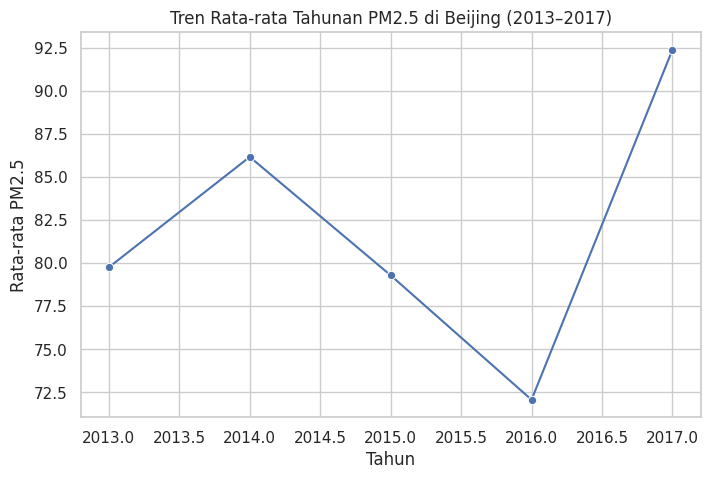

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=pm25_yearly, x='year', y='PM2.5', marker='o')
plt.title('Tren Rata-rata Tahunan PM2.5 di Beijing (2013–2017)')
plt.ylabel('Rata-rata PM2.5')
plt.xlabel('Tahun')
plt.show()

**Insight:**

Terlihat bahwa pola pergerakan konsentrasi polutan bersifat fluktuatif dan tidak menunjukkan tren penurunan yang konsisten.

***Pola Fluktuatif***

*   Tahun 2013 → sekitar 79.8
*   Tahun 2014 → meningkat menjadi sekitar 86.2
*   Tahun 2015 → kembali menurun
*   Tahun 2016 → mencapai titik terendah (~72.1)
*   Tahun 2017 → meningkat tajam menjadi yang tertinggi (~92.4)

Hal ini menunjukkan bahwa kualitas udara tidak membaik secara stabil selama periode pengamatan.

***Tahun 2016 sebagai Titik Terendah***

*   Penurunan signifikan pada 2016 dapat mengindikasikan bahwa dampak kebijakan pengendalian emisi yang mulai terasa atau faktor meteorologi yang lebih mendukung penyebaran polutan. Namun, penurunan tersebut tidak berlanjut ke 2017.

***Lonjakan Tajam Tahun 2017***

Peningkatan drastis pada 2017 menjadi temuan penting dengan kemungkinan penyebab:

*   Episode smog berat dalam beberapa bulan tertentu
*   Kondisi cuaca yang kurang mendukung dispersi polutan
*   Variasi aktivitas industri atau pembakaran musiman
*   Temuan ini menunjukkan bahwa kebijakan pengendalian emisi sejak 2013 belum menghasilkan perbaikan yang konsisten.

### Explore Analisis Pola Musiman PM2.5

In [ ]:
pm25_monthly = (
    df_air.groupby('month', observed=True)['PM2.5']
          .mean()
          .reset_index()
)
pm25_monthly

,month,PM2.5
0,1,93.760559
1,2,89.213391
2,3,94.594295
3,4,73.367153
4,5,63.541148
5,6,68.837547
6,7,71.401115
7,8,53.465479
8,9,61.281071
9,10,91.715859


**Insight:**

***Polusi Tertinggi Terjadi di Musim Dingin***

Bulan dengan rata-rata PM2.5 tertinggi:
*   Desember → 103.68 (tertinggi)
*   Januari → 93.76
*   November → 93.32
*   Maret → 94.59
*   Oktober → 91.72

Ini menunjukkan bahwa periode akhir dan awal tahun memiliki tingkat polusi tertinggi.
Secara klimatologis, hal ini konsisten dengan:
*   Penggunaan pemanas berbahan bakar fosil di musim dingin
*   Fenomena inversi suhu yang menjebak polutan di permukaan
*   Kecepatan angin yang lebih rendah

***Polusi Terendah Terjadi di Musim Panas***

Bulan dengan rata-rata terendah:

*   Agustus → 53.47  (terendah)
*   Mei → 63.54
*   September → 61.28

Musim panas cenderung memiliki:
*   Lebih banyak hujan
*   Angin lebih kuat
*   Dispersi polutan lebih baik

### Explore Visualisasi Pola Musiman

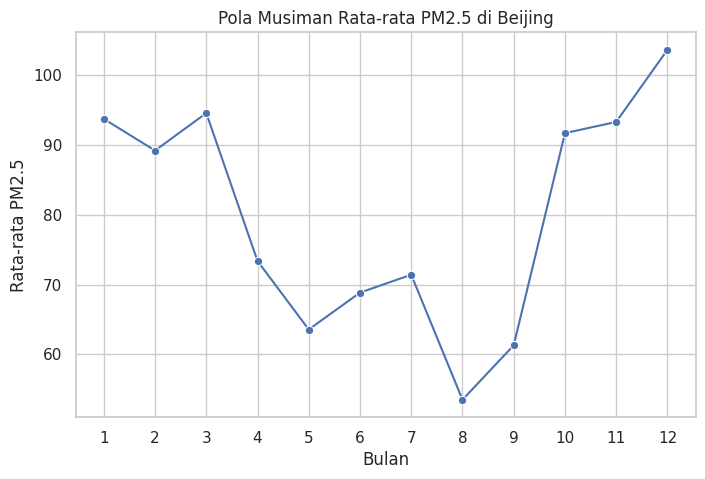

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=pm25_monthly, x='month', y='PM2.5', marker='o')
plt.title('Pola Musiman Rata-rata PM2.5 di Beijing')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(range(1,13))
plt.show()

**Insight:**

Grafik menunjukkan pola berbentuk U:
*   Tinggi di awal tahun
*   Menurun tajam pertengahan tahun
*   Naik kembali di akhir tahun

Ini mengindikasikan pola musiman yang konsisten dan berulang setiap tahun.

### Explore Heatmap Month vs Year

In [ ]:
pm25_pivot = (
    df_air.groupby(['year','month'], observed=True)['PM2.5']
          .mean()
          .reset_index()
          .pivot(index='month', columns='year', values='PM2.5')
)

pm25_pivot

year,2013,2014,2015,2016,2017
month,,,,,
1,NaN,98.390065,96.122711,66.799619,113.729839
2,NaN,153.808780,93.078199,42.821959,68.801463
3,104.571909,95.227431,86.384123,92.193716,NaN
4,62.207292,91.825231,71.839560,67.596528,NaN
5,81.876512,62.177315,55.727503,54.383262,NaN
6,101.542242,54.435571,60.668414,58.703962,NaN
7,66.839665,89.148141,60.951501,68.665155,NaN
8,60.588374,63.157616,44.303707,45.812220,NaN
9,76.140304,66.250880,48.758218,53.974884,NaN


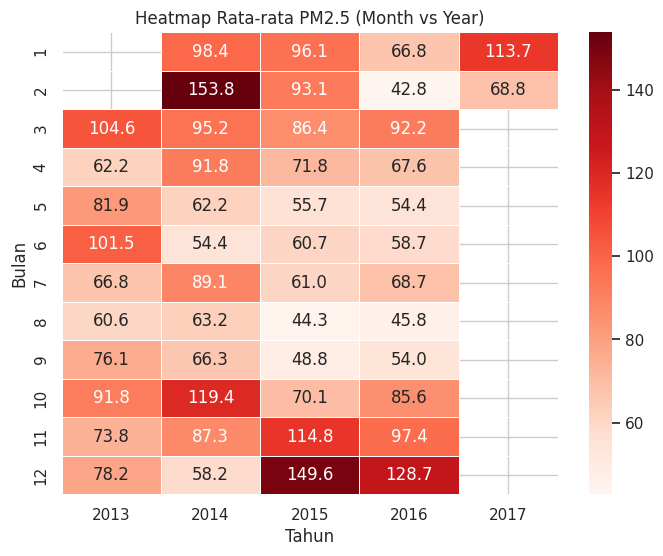

In [ ]:
plt.figure(figsize=(8,6))

sns.heatmap(
    pm25_pivot,
    cmap='Reds',
    annot=True,
    fmt=".1f",
    linewidths=0.5
)

plt.title("Heatmap Rata-rata PM2.5 (Month vs Year)")
plt.xlabel("Tahun")
plt.ylabel("Bulan")
plt.show()

**Insight:**

Pola musiman menunjukkan konsentrasi PM2.5 tertinggi secara konsisten terjadi pada musim dingin (Des–Feb), dengan episode ekstrem pada Februari 2014 dan Desember 2015. Musim panas relatif lebih stabil dan rendah.

### Explore Korelasi PM2.5 dengan Variabel Cuaca

In [ ]:
weather_cols = ['TEMP','RAIN','WSPM','PRES','DEWP']

correlation = df_air[['PM2.5'] + weather_cols].corr()
correlation

,PM2.5,TEMP,RAIN,WSPM,PRES,DEWP
PM2.5,1.000000,-0.131607,-0.014452,-0.271425,0.019862,0.113045
TEMP,-0.131607,1.000000,0.037647,0.032601,-0.813312,0.820247
RAIN,-0.014452,0.037647,1.000000,0.020975,-0.060952,0.086259
WSPM,-0.271425,0.032601,0.020975,1.000000,0.065400,-0.296771
PRES,0.019862,-0.813312,-0.060952,0.065400,1.000000,-0.750271
DEWP,0.113045,0.820247,0.086259,-0.296771,-0.750271,1.000000


**Insight:**

***PM2.5 vs TEMP***

Korelasi: -0.13 (Negatif lemah)

*   Nilai korelasi -0.13 menunjukkan hubungan negatif yang lemah antara suhu dan PM2.5.
*   Ketika suhu meningkat, PM2.5 cenderung sedikit menurun. Namun pengaruhnya tidak kuat secara linear.

Musim dingin berkaitan dengan:
*   Pembakaran bahan bakar untuk pemanas
*   Inversi suhu yang menjebak polutan
*   Angin yang lebih lemah

Namun karena korelasi hanya -0.13, suhu bukan faktor dominan tunggal.

***PM2.5 vs WSPM (Kecepatan Angin)***

Korelasi: -0.27 (Negatif sedang-lemah)

*   Nilai -0.27 menunjukkan hubungan negatif yang lebih jelas dibanding suhu.
*   Semakin tinggi kecepatan angin, semakin rendah PM2.5.
*   Angin membantu menyebarkan dan membersihkan polutan.

Kecepatan angin adalah faktor meteorologi paling berpengaruh di antara variabel yang diuji. Ini mendukung pola musiman:
*   Musim dingin → angin lemah → polusi terjebak
*   Musim panas → angin lebih kuat → udara lebih bersih

***PM2.5 vs RAIN***

Korelasi: -0.014 (Hampir nol)

*   Nilai -0.014 menunjukkan hampir tidak ada hubungan linear antara curah hujan dan PM2.5.

Kemungkinan:
*   Hujan tidak sering terjadi
*   Efek pembersihan hujan bersifat episodik, bukan konsisten
*   Variabel RAIN mungkin lebih cocok dianalisis sebagai event-based, bukan korelasi linear

***PM2.5 vs PRES***

Korelasi: 0.02 (Positif lemah)

Artinya tekanan udara tidak secara langsung mempengaruhi konsentrasi PM2.5 dalam skala agregasi ini.

***PM2.5 vs DEWP***

Korelasi: 0.11 (Positif lemah)

Kemungkinan:
*   Kelembaban tinggi membantu pembentukan partikel sekunder
*   Kondisi lembab memperparah akumulasi polutan. Namun efeknya relatif kecil.

### Explore Visualisasi Scatterplot Korelasi PM2.5 dengan Variabel Cuaca

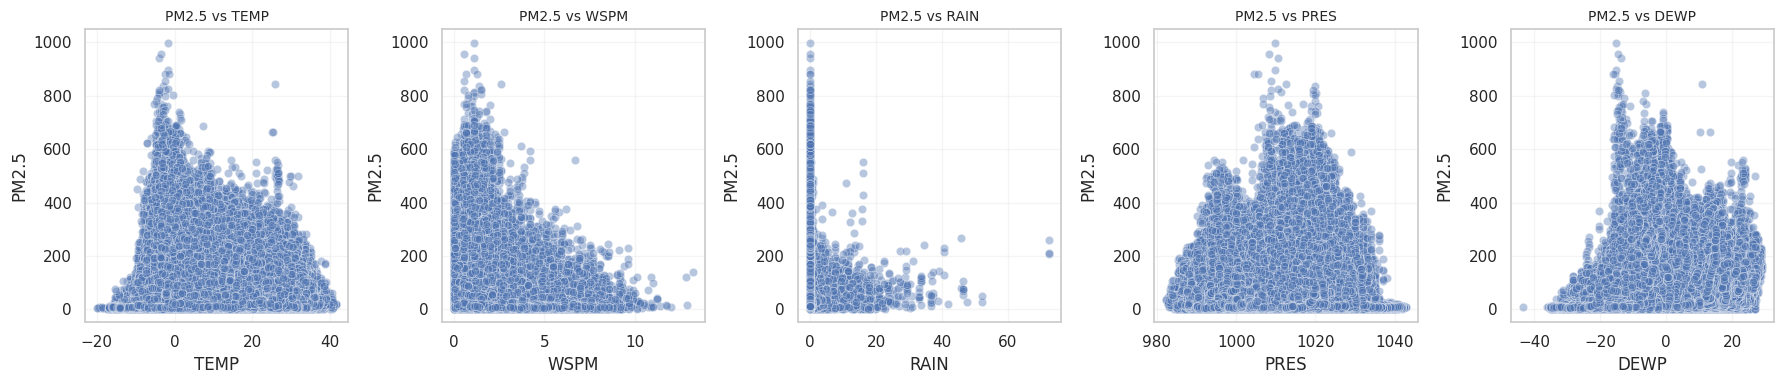

In [ ]:
plt.figure(figsize=(18,4))

variables = ['TEMP', 'WSPM', 'RAIN', 'PRES', 'DEWP']

for i, var in enumerate(variables, 1):
    plt.subplot(1, 5, i)
    sns.scatterplot(
        data=df_air,
        x=var,
        y='PM2.5',
        alpha=0.4
    )
    plt.title(f'PM2.5 vs {var}', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('PM2.5')
    plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()

**Insight:**

***PM2.5 vs TEMP***

Dari scatterplot terlihat:

*   Pada suhu rendah (musim dingin), banyak titik PM2.5 tinggi.
*   Pada suhu tinggi (musim panas), nilai PM2.5 cenderung lebih rendah dan lebih menyebar.

***PM2.5 vs WSPM (Kecepatan Angin)***

Scatterplot menunjukkan:
*   Saat WSPM rendah (0–2 m/s), PM2.5 bisa sangat tinggi.
*   Saat WSPM meningkat (>5 m/s), PM2.5 hampir selalu rendah.
*   Area PM2.5 ekstrem hampir tidak ada di angin kencang.

***PM2.5 vs RAIN***

Scatterplot menunjukkan:
*   Banyak data RAIN = 0 (tidak hujan)
*   PM2.5 tetap bisa tinggi atau rendah tanpa hujan
*   Tidak ada pola linear jelas

***PM2.5 vs PRES***

Dari scatterplot terlihat:

*   Pada tekanan udara menengah–tinggi (±1010–1025 hPa), banyak titik PM2.5 tinggi.
*   Pada tekanan sangat rendah atau sangat tinggi, nilai PM2.5 cenderung lebih menyebar.
*   Tidak terlihat pola linear yang kuat, namun terdapat indikasi bahwa kondisi tekanan stabil dapat berkaitan dengan akumulasi polutan.

***PM2.5 vs DEWP***

Dari scatterplot terlihat:

*   Pada nilai dew point rendah (udara sangat kering dan dingin), terdapat banyak kejadian PM2.5 tinggi.
*   Pada dew point tinggi (udara lembab & hangat), PM2.5 cenderung lebih menyebar dan relatif lebih rendah.
*   Titik-titik ekstrem PM2.5 sering muncul pada rentang dew point negatif.


### Explore Correlation Summary Metric

In [ ]:
weather_cols = ['TEMP','RAIN','WSPM','PRES','DEWP']

corr_pm25 = df_air[['PM2.5'] + weather_cols].corr()['PM2.5'].drop('PM2.5')

corr_pm25

,PM2.5
TEMP,-0.131607
RAIN,-0.014452
WSPM,-0.271425
PRES,0.019862
DEWP,0.113045


In [ ]:
most_influential = corr_pm25.abs().idxmax()
value = corr_pm25[most_influential]

most_influential, value

('WSPM', np.float64(-0.271424667740368))

In [ ]:
corr_df = corr_pm25.reset_index()
corr_df.columns = ['Variable', 'Correlation']

corr_df['Abs_Corr'] = corr_df['Correlation'].abs()

corr_df = corr_df.sort_values(by='Abs_Corr', ascending=False)

corr_df

,Variable,Correlation,Abs_Corr
2,WSPM,-0.271425,0.271425
0,TEMP,-0.131607,0.131607
4,DEWP,0.113045,0.113045
3,PRES,0.019862,0.019862
1,RAIN,-0.014452,0.014452


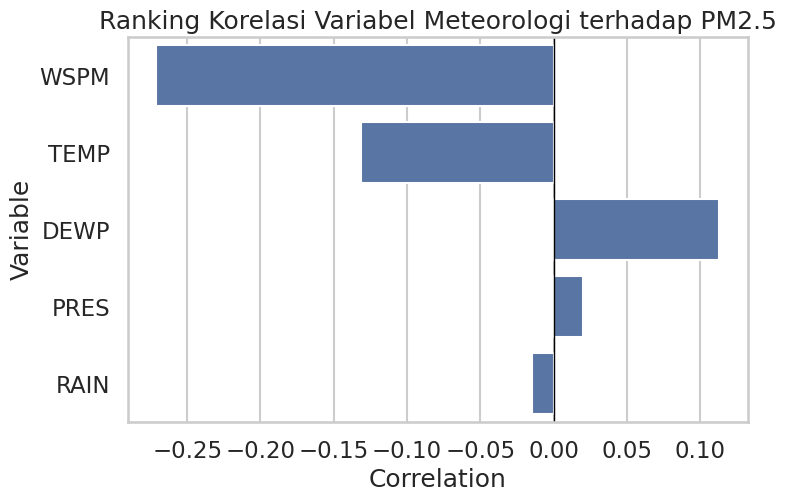

In [ ]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=corr_df,
    x='Correlation',
    y='Variable'
)

plt.title('Ranking Korelasi Variabel Meteorologi terhadap PM2.5')
plt.axvline(0, color='black', linewidth=1)
plt.show()

Insight:

*   WSPM paling kuat (-0.27)
*   TEMP kedua (-0.13)
*   DEWP kecil positif
*   RAIN & PRES hampir nol

### Explore Analisis Weekday vs Weekend


In [ ]:
df_air['day_name'] = df_air['datetime'].dt.day_name()

In [ ]:
df_air['day_type'] = df_air['day_name'].apply(
    lambda x: 'Weekend' if x in ['Saturday','Sunday'] else 'Weekday'
)

In [ ]:
pm25_daytype = (
    df_air.groupby('day_type', observed=True)['PM2.5']
          .mean()
          .reset_index()
)

pm25_daytype

,day_type,PM2.5
0,Weekday,78.197461
1,Weekend,83.937504


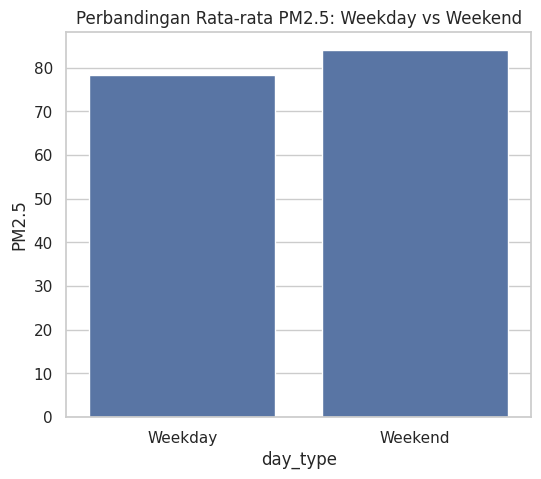

In [ ]:
plt.figure(figsize=(6,5))
sns.barplot(data=pm25_daytype, x='day_type', y='PM2.5')
plt.title('Perbandingan Rata-rata PM2.5: Weekday vs Weekend')
plt.show()

**Insight:**

Hasil ini mengindikasikan bahwa dinamika polusi udara di Beijing lebih dipengaruhi oleh faktor lingkungan dan musiman dibandingkan pola aktivitas harian masyarakat.

Dengan kata lain, kebijakan pengendalian emisi tidak cukup hanya berfokus pada pengurangan aktivitas di hari kerja, tetapi perlu mempertimbangkan faktor meteorologi dan sumber emisi non-industri.

### Explore Wilayah yang Tercemar

In [ ]:
pm25_station = (
    df_air.groupby('station', observed=True)['PM2.5']
          .mean()
          .sort_values(ascending=False)
          .reset_index()
)

pm25_station

,station,PM2.5
0,Dongsi,86.144243
1,Nongzhanguan,85.079472
2,Wanshouxigong,85.067548
3,Gucheng,84.074802
4,Wanliu,83.467612
5,Guanyuan,82.897522
6,Aotizhongxin,82.540623
7,Tiantan,82.033097
8,Shunyi,79.437962
9,Changping,70.986438


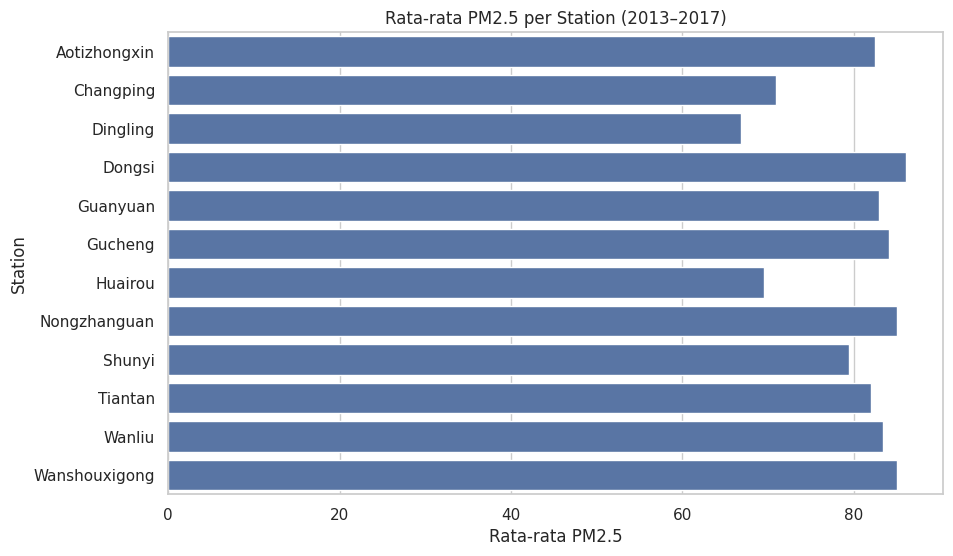

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=pm25_station, x='PM2.5', y='station')
plt.title('Rata-rata PM2.5 per Station (2013–2017)')
plt.xlabel('Rata-rata PM2.5')
plt.ylabel('Station')
plt.show()

**Insight:**



*   Polusi udara tidak terdistribusi secara merata di seluruh Beijing.
*   Area pusat kota dan wilayah dengan aktivitas ekonomi tinggi cenderung memiliki konsentrasi PM2.5 lebih tinggi.
*   Wilayah suburban menunjukkan kualitas udara relatif lebih baik.

Hal ini mengindikasikan bahwa kebijakan pengendalian emisi mungkin perlu difokuskan secara spasial, bukan hanya secara umum.

**PENDUKUNG PETA**

In [ ]:
station_coords = {
    'Dongsi': (39.93, 116.42),
    'Nongzhanguan': (39.94, 116.47),
    'Wanshouxigong': (39.88, 116.35),
    'Gucheng': (39.91, 116.18),
    'Wanliu': (39.99, 116.30),
    'Guanyuan': (39.93, 116.36),
    'Aotizhongxin': (39.98, 116.40),
    'Tiantan': (39.88, 116.41),
    'Shunyi': (40.13, 116.65),
    'Changping': (40.22, 116.23),
    'Huairou': (40.32, 116.63),
    'Dingling': (40.29, 116.22)
}

In [ ]:
pm25_station['lat'] = pm25_station['station'].map(lambda x: station_coords[x][0])
pm25_station['lon'] = pm25_station['station'].map(lambda x: station_coords[x][1])

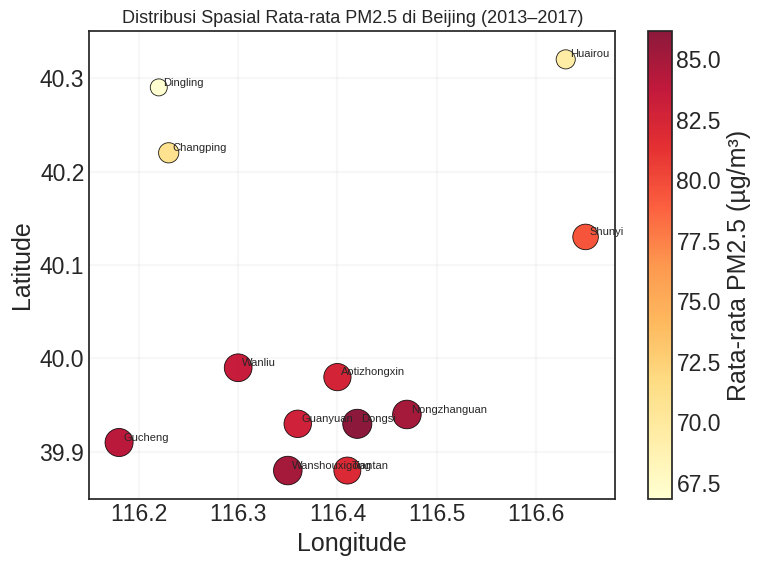

In [ ]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-v0_8-white')

sizes = (pm25_station['PM2.5'] - pm25_station['PM2.5'].min()) * 15 + 150

scatter = plt.scatter(
    pm25_station['lon'],
    pm25_station['lat'],
    c=pm25_station['PM2.5'],
    cmap='YlOrRd',
    s=sizes,
    edgecolor='black',
    linewidth=0.6,
    alpha=0.9
)

plt.colorbar(scatter, label='Rata-rata PM2.5 (µg/m³)')

plt.title('Distribusi Spasial Rata-rata PM2.5 di Beijing (2013–2017)', fontsize=13)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.xlim(116.15, 116.68)
plt.ylim(39.85, 40.35)

for i, row in pm25_station.iterrows():
    plt.text(
        row['lon'] + 0.004,
        row['lat'] + 0.002,
        row['station'],
        fontsize=8
    )

plt.grid(alpha=0.15)
plt.tight_layout()
plt.show()

### Explore Seasonal per Tahun

In [ ]:
pm25_month_year = (
    df_air.groupby(['year','month'], observed=True)['PM2.5']
          .mean()
          .reset_index()
)

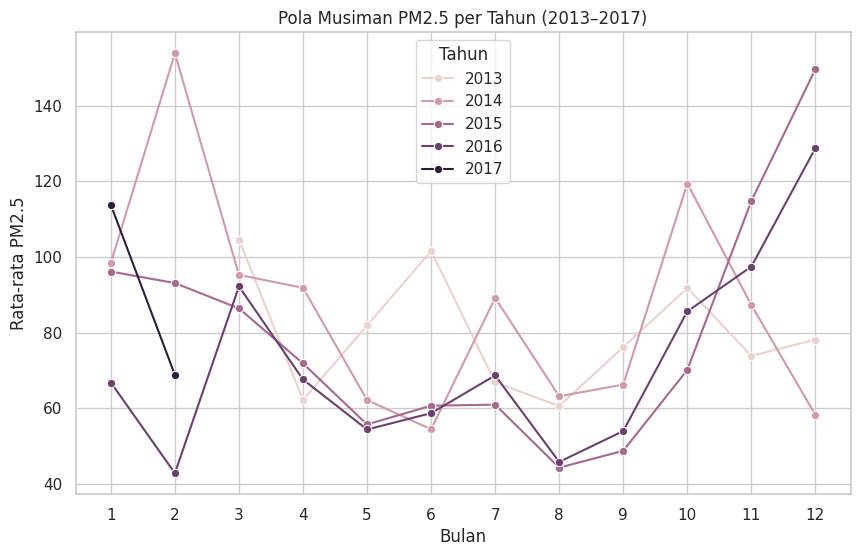

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=pm25_month_year,
    x='month',
    y='PM2.5',
    hue='year',
    marker='o'
)

plt.title('Pola Musiman PM2.5 per Tahun (2013–2017)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(range(1,13))
plt.legend(title='Tahun')
plt.show()

**Insight:**

*   Pola musiman lebih dominan dibanding tren tahunan.
*   Lonjakan tahunan sering dipicu oleh bulan-bulan musim dingin.
*   Evaluasi kebijakan tidak bisa hanya berbasis rata-rata tahunan, tetapi perlu memperhatikan dinamika musiman.


### Explore Distribusi PM2.5 (Histogram / KDE)

<Axes: xlabel='PM2.5', ylabel='Count'>

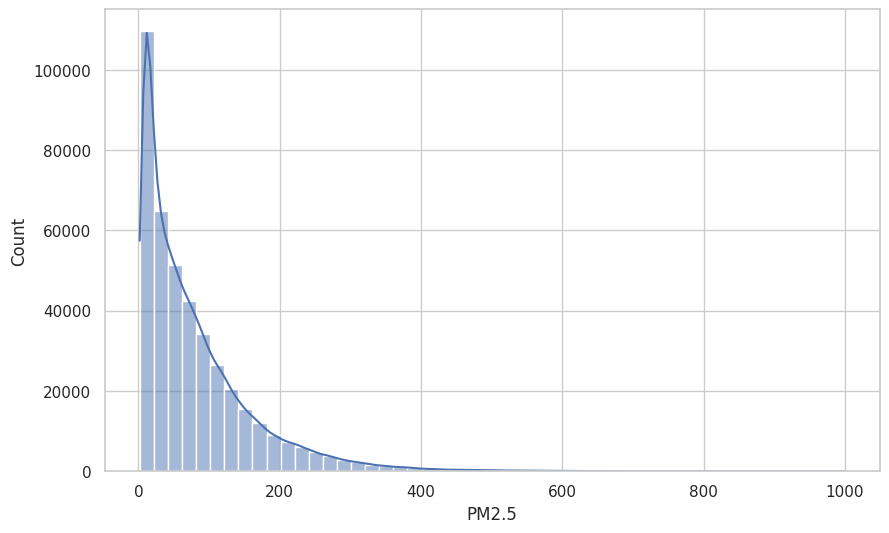

In [ ]:
sns.histplot(df_air['PM2.5'], bins=50, kde=True)

**Insight:**

Distribusi right-skewed ini umum pada data lingkungan, di mana mayoritas waktu polusi berada pada level tertentu, namun sesekali terjadi lonjakan ekstrem akibat kombinasi faktor meteorologi dan aktivitas manusia.

### Explore Analisis Jam (Hourly Pattern)

In [ ]:
pm25_hour = (
    df_air.groupby('hour', observed=True)['PM2.5']
          .mean()
          .reset_index()
)

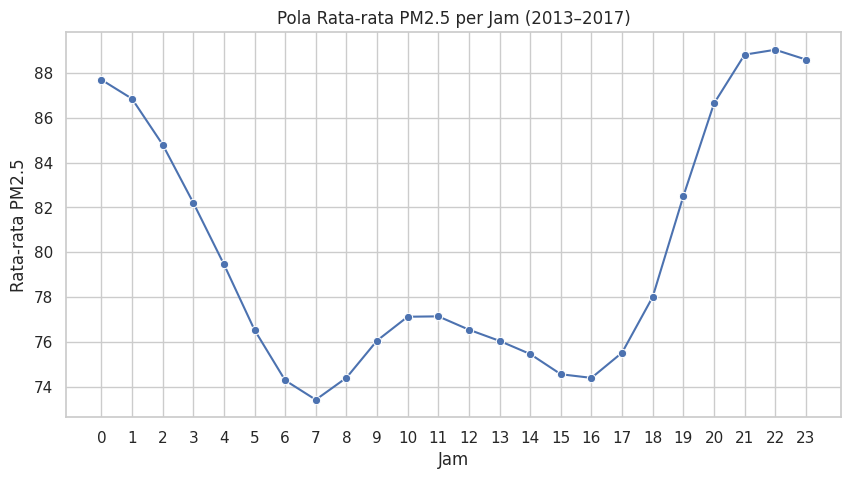

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(
    data=pm25_hour,
    x='hour',
    y='PM2.5',
    marker='o'
)

plt.title('Pola Rata-rata PM2.5 per Jam (2013–2017)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata PM2.5')
plt.xticks(range(0,24))
plt.show()

**Insight:**

*   Polusi udara tidak hanya dipengaruhi musim, tetapi juga memiliki dinamika harian.
*   Peningkatan malam hari menunjukkan kemungkinan dominasi faktor meteorologi dibanding semata aktivitas lalu lintas.
*   Pengendalian emisi mungkin perlu mempertimbangkan dinamika malam hari, bukan hanya jam kerja.
*   Korelasi sebelumnya menunjukkan bahwa kecepatan angin memiliki hubungan negatif dengan PM2.5. Jika angin melemah pada malam hari, hal ini dapat menjelaskan peningkatan konsentrasi polutan pada jam 20.00 - 23.00.

### Explore Heatmap Korelasi Lengkap

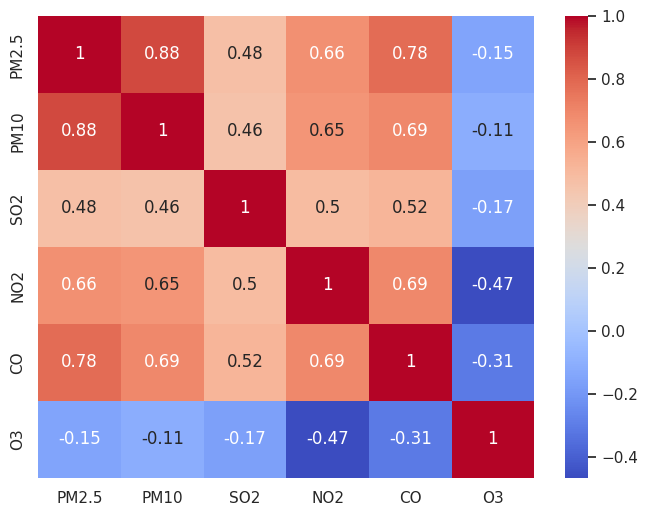

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_air[['PM2.5','PM10','SO2','NO2','CO','O3']].corr(),
            annot=True, cmap='coolwarm')
plt.show()

**Insight:**

*   PM2.5 sangat terkait dengan PM10
*   Emisi pembakaran (CO & NO2) berkontribusi signifikan
*   O3 memiliki dinamika berbeda dibanding polutan primer
*   Struktur korelasi konsisten dengan teori kualitas udara
*   Struktur korelasi ini menunjukkan bahwa polusi udara di Beijing selama periode pengamatan kemungkinan besar didominasi oleh sumber pembakaran (combustion-related emissions), seperti kendaraan bermotor dan industri.
*   Sementara itu, ozon menunjukkan perilaku yang lebih dipengaruhi oleh proses fotokimia dibandingkan langsung oleh emisi primer.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren perubahan konsentrasi PM2.5 di Beijing sejak penerapan kebijakan pengendalian emisi pada tahun 2013?

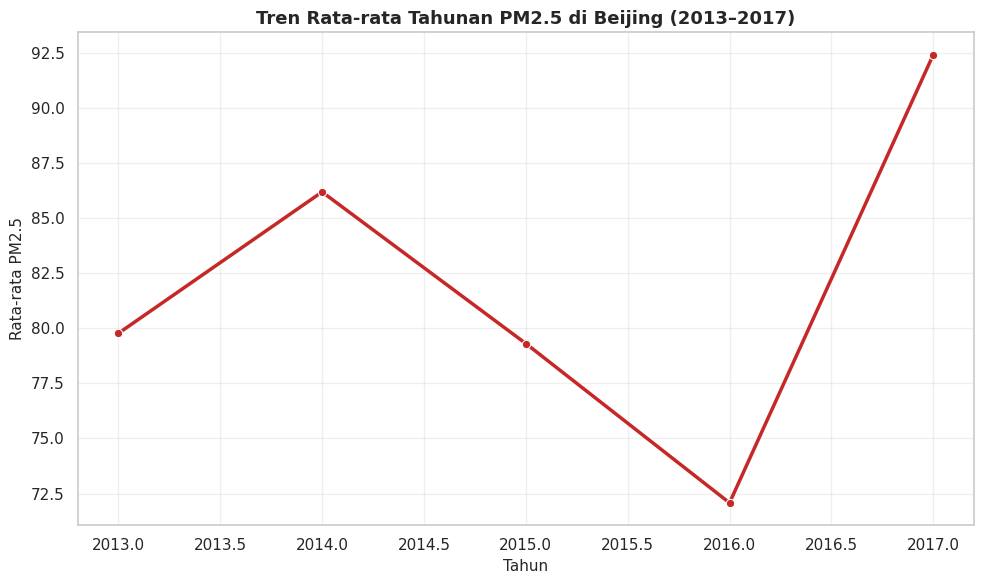

In [ ]:
sns.lineplot(
    data=pm25_yearly,
    x='year',
    y='PM2.5',
    marker='o',
    color='#C62828',
    linewidth=2.5
)

plt.title('Tren Rata-rata Tahunan PM2.5 di Beijing (2013–2017)', fontsize=13, weight='bold')
plt.ylabel('Rata-rata PM2.5', fontsize=11)
plt.xlabel('Tahun', fontsize=11)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**JAWABAN/INSIGHT:**

*   Meskipun terdapat penurunan sementara pada periode 2014 hingga 2016, tren keseluruhan tidak menunjukkan penurunan yang stabil dan berkelanjutan sejak 2013.
*   Tahun 2017 justru mencatat rata-rata PM2.5 tertinggi selama periode pengamatan.
*   Dengan demikian, tidak terdapat bukti kuat bahwa kebijakan pengendalian emisi sejak 2013 menghasilkan penurunan konsentrasi PM2.5 yang konsisten dalam periode 2013 hingga 2017.

Fluktuasi ini mengindikasikan bahwa:
*   Faktor musiman dan kondisi meteorologi kemungkinan memiliki pengaruh signifikan terhadap variasi tahunan.
*   Evaluasi efektivitas kebijakan perlu mempertimbangkan dinamika musiman, bukan hanya agregasi tahunan.

### Pertanyaan 2: Kapan periode dengan tingkat smog tertinggi terjadi, dan apakah terdapat pola musiman yang konsisten?

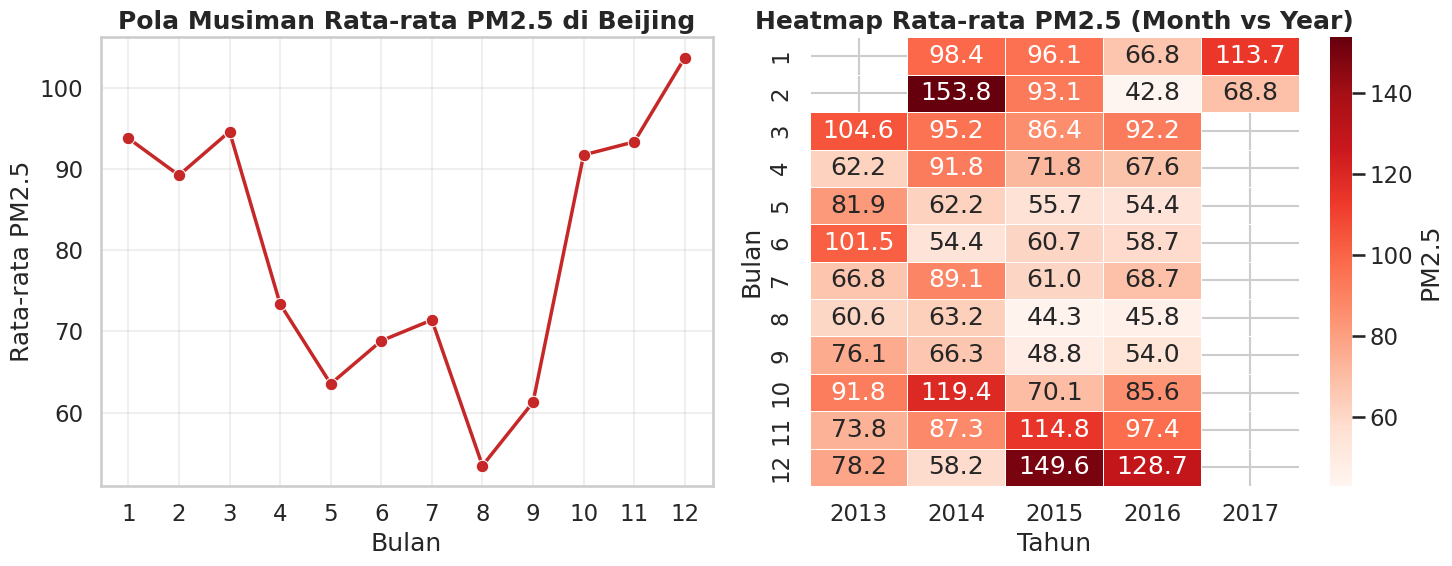

In [ ]:
sns.set_style("whitegrid")
sns.set_context("talk")

fig, axes = plt.subplots(1, 2, figsize=(15,6))

sns.lineplot(
    data=pm25_monthly,
    x='month',
    y='PM2.5',
    marker='o',
    color='#C62828',
    linewidth=2.5,
    ax=axes[0]
)

axes[0].set_title('Pola Musiman Rata-rata PM2.5 di Beijing', weight='bold')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Rata-rata PM2.5')
axes[0].set_xticks(range(1,13))
axes[0].grid(alpha=0.3)

sns.heatmap(
    pm25_pivot,
    cmap='Reds',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'PM2.5'},
    ax=axes[1]
)

axes[1].set_title("Heatmap Rata-rata PM2.5 (Month vs Year)", weight='bold')
axes[1].set_xlabel("Tahun")
axes[1].set_ylabel("Bulan")

plt.tight_layout()
plt.show()


**JAWABAN/INSIGHT:**

*   Periode dengan tingkat smog tertinggi terjadi pada musim dingin, khususnya Desember–Februari.
*   Terdapat pola musiman yang konsisten selama lima tahun pengamatan.
*   Episode tahunan ekstrem hampir selalu dipicu oleh lonjakan pada musim dingin.

Konsistensi pola musiman menunjukkan bahwa dinamika PM2.5 di Beijing sangat dipengaruhi oleh faktor musiman dan kondisi atmosfer musim dingin, seperti:
*   Inversi suhu
*   Dispersi udara yang rendah
*   Aktivitas pemanasan

Dengan demikian, pengendalian polusi kemungkinan perlu difokuskan secara lebih intensif pada periode musim dingin.

### Pertanyaan 3: Sejauh mana kondisi meteorologi berhubungan dengan tingkat konsentrasi PM2.5?

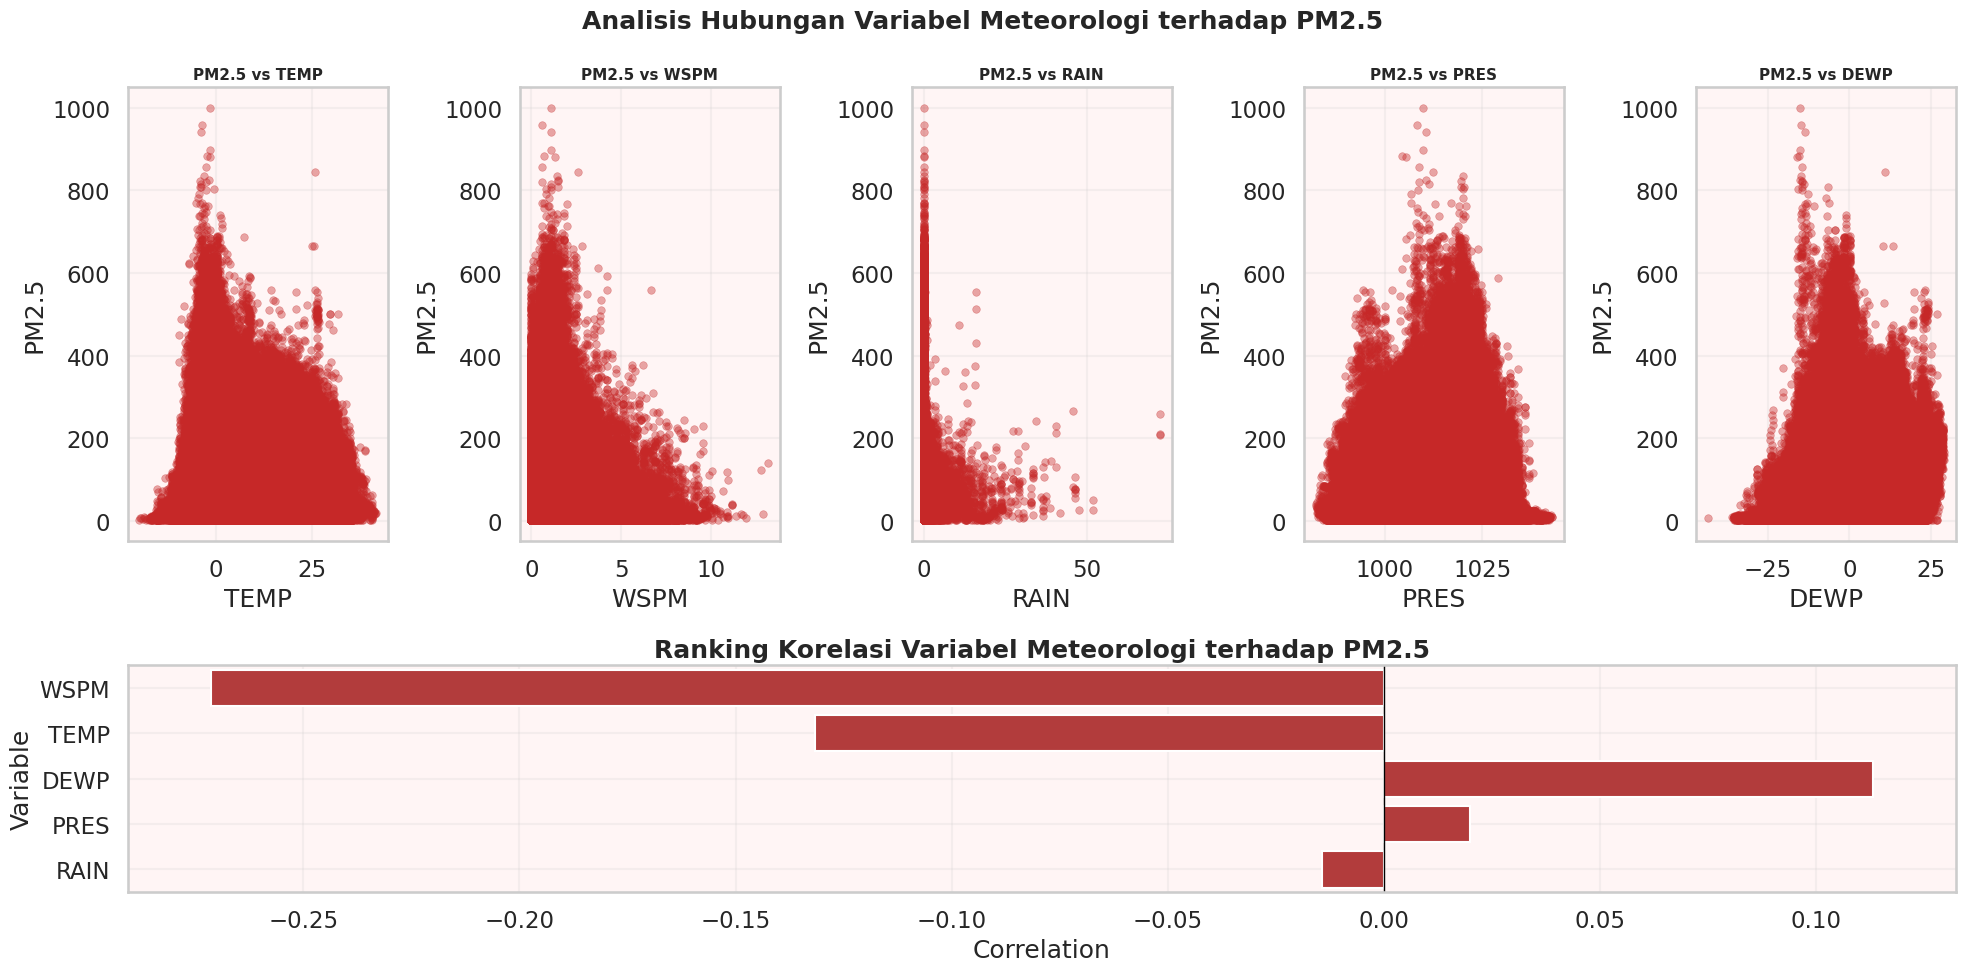

In [ ]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.rcParams['axes.facecolor'] = '#FFF5F5'
plt.rcParams['figure.facecolor'] = 'white'

variables = ['TEMP', 'WSPM', 'RAIN', 'PRES', 'DEWP']

fig = plt.figure(figsize=(20,10))
gs = fig.add_gridspec(2, 5, height_ratios=[2, 1])

for i, var in enumerate(variables):
    ax = fig.add_subplot(gs[0, i])

    sns.scatterplot(
        data=df_air,
        x=var,
        y='PM2.5',
        color='#C62828',
        alpha=0.4,
        s=30,
        edgecolor=None,
        ax=ax
    )

    ax.set_title(f'PM2.5 vs {var}', fontsize=11, weight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('PM2.5')
    ax.grid(alpha=0.2)

ax_bar = fig.add_subplot(gs[1, :])

sns.barplot(
    data=corr_df,
    x='Correlation',
    y='Variable',
    color='#C62828',
    ax=ax_bar
)


ax_bar.set_title('Ranking Korelasi Variabel Meteorologi terhadap PM2.5', weight='bold')
ax_bar.axvline(0, color='black', linewidth=1)
ax_bar.grid(alpha=0.2)

fig.suptitle('Analisis Hubungan Variabel Meteorologi terhadap PM2.5',
             fontsize=18, weight='bold')

plt.tight_layout()
plt.show()


**JAWABAN/INSIGHT:**

*   Hubungan antara kondisi meteorologi dan PM2.5 bersifat lemah hingga moderat.
*   Kecepatan angin merupakan faktor meteorologi paling berpengaruh terhadap konsentrasi PM2.5.
*   Variabel lain (suhu, dew point, tekanan, hujan) menunjukkan pengaruh yang relatif kecil.
*   Pola musiman kemungkinan memiliki peran lebih besar dibandingkan pengaruh variabel cuaca secara individual.

Hasil ini menunjukkan bahwa:
*   Dispersi polutan (melalui angin) lebih berperan dibanding proses pencucian atmosfer (hujan).
*   Variasi PM2.5 tidak sepenuhnya dapat dijelaskan oleh faktor meteorologi saja.
*   Faktor emisi dan dinamika musiman kemungkinan menjadi determinan utama.

### Pertanyaan 4: Bagaimana perbedaan tingkat polusi udara antar wilayah (station) di Beijing?

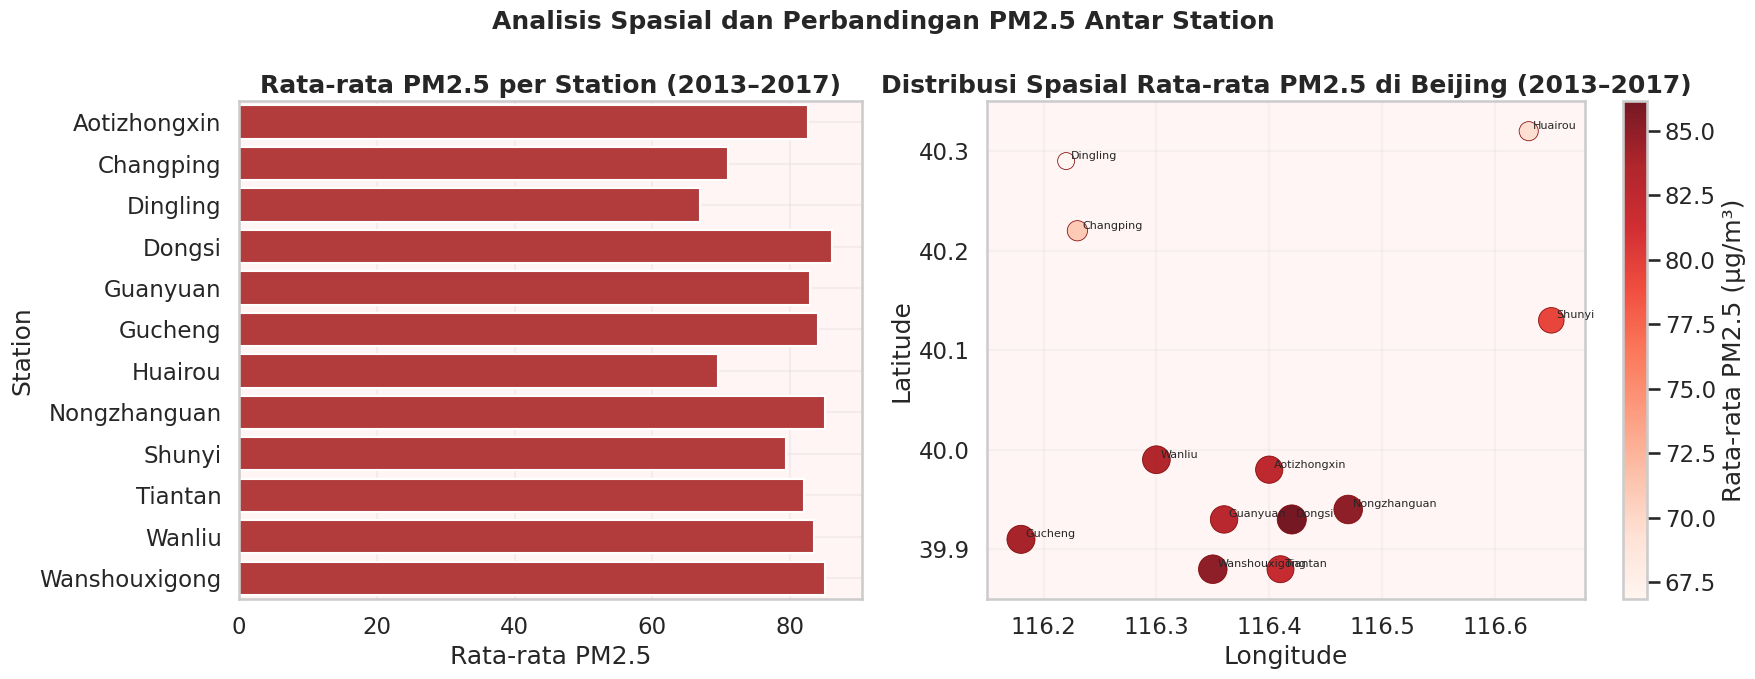

In [ ]:
sns.set_style("whitegrid")
sns.set_context("talk")

plt.rcParams['axes.facecolor'] = '#FFF5F5'
plt.rcParams['figure.facecolor'] = 'white'

fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.2])

ax1 = fig.add_subplot(gs[0,0])

pm25_sorted = pm25_station.sort_values(by='PM2.5', ascending=False)

sns.barplot(
    data=pm25_sorted,
    x='PM2.5',
    y='station',
    color='#C62828',
    ax=ax1
)

ax1.set_title('Rata-rata PM2.5 per Station (2013–2017)', weight='bold')
ax1.set_xlabel('Rata-rata PM2.5')
ax1.set_ylabel('Station')
ax1.grid(alpha=0.2)

ax2 = fig.add_subplot(gs[0,1])

sizes = (pm25_station['PM2.5'] - pm25_station['PM2.5'].min()) * 15 + 150

scatter = ax2.scatter(
    pm25_station['lon'],
    pm25_station['lat'],
    c=pm25_station['PM2.5'],
    cmap='Reds',
    s=sizes,
    edgecolor='#7f0000',
    linewidth=0.6,
    alpha=0.9
)

cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('Rata-rata PM2.5 (µg/m³)')

ax2.set_title('Distribusi Spasial Rata-rata PM2.5 di Beijing (2013–2017)', weight='bold')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

ax2.set_xlim(116.15, 116.68)
ax2.set_ylim(39.85, 40.35)

for i, row in pm25_station.iterrows():
    ax2.text(
        row['lon'] + 0.004,
        row['lat'] + 0.002,
        row['station'],
        fontsize=8
    )

ax2.grid(alpha=0.15)

fig.suptitle(
    'Analisis Spasial dan Perbandingan PM2.5 Antar Station',
    fontsize=18,
    weight='bold'
)

plt.tight_layout()
plt.show()


JAWABAN/INSIGHT:

*   Terdapat perbedaan tingkat polusi antar wilayah.
*   Selisihnya cukup terlihat (~19 µg/m³), namun tidak menunjukkan ketimpangan ekstrem.
*   Wilayah pusat kota cenderung memiliki konsentrasi lebih tinggi dibanding wilayah pinggiran.

Perbedaan ini kemungkinan dipengaruhi oleh:
*   Kepadatan aktivitas ekonomi dan transportasi.
*   Konsentrasi sumber emisi di area pusat.
*   Faktor topografi dan sirkulasi udara lokal.

Namun, secara keseluruhan, pola musiman dan dinamika tahunan tampak lebih dominan dibanding perbedaan spasial.

## Analisis Lanjutan (Geospatial Analysis)

Alasan penggunaan Geospatial Analysis adalah polusi adalah fenomena yang inheren secara spasial. Dengan adanya koordinat (latitude dan longitude) dalam dataset multi-location, maka tidak hanya melihat angka mati, melainkan jejak fisik di dunia nyata. Data ini memungkinkan untuk memetakan bagaimana polusi bergerak, terkonsentrasi di titik tertentu, dan menyebar antarwilayah, sehingga analisisnya menjadi jauh lebih akurat dan kontekstual.

**SPATIAL WINTER VS SUMMER**

In [ ]:
winter_avg = (
    winter
    .groupby('station', observed=True)['PM2.5']
    .mean()
    .reset_index()
)

summer_avg = (
    summer
    .groupby('station', observed=True)['PM2.5']
    .mean()
    .reset_index()
)

In [ ]:
winter_avg

,station,PM2.5
0,Aotizhongxin,94.321283
1,Changping,84.579109
2,Dingling,77.624354
3,Dongsi,103.053693
4,Guanyuan,98.265489
5,Gucheng,101.141113
6,Huairou,80.170672
7,Nongzhanguan,104.873280
8,Shunyi,95.260607
9,Tiantan,100.626789


In [ ]:
summer_avg

,station,PM2.5
0,Aotizhongxin,67.320369
1,Changping,56.227095
2,Dingling,53.625845
3,Dongsi,71.216791
4,Guanyuan,68.983650
5,Gucheng,65.821924
6,Huairou,56.782175
7,Nongzhanguan,66.446762
8,Shunyi,64.829880
9,Tiantan,68.051189


**Kesimpulan Geospatial Winter vs Summer**
*   Terdapat peningkatan signifikan PM2.5 di seluruh station saat musim dingin.
*   Kenaikan bersifat sistemik dan regional.
*   Wilayah pusat kota tetap menjadi hotspot relatif.
*   Faktor meteorologi memperkuat akumulasi polutan.

In [ ]:
station_coords = pd.DataFrame({
    'station': [
        'Aotizhongxin','Changping','Dingling','Dongsi',
        'GuanYuan','Gucheng','Huairou','Nongzhanguan',
        'Shunyi','Tiantan','Wanliu','Wanshouxigong'
    ],
    'lat': [
        39.982, 40.220, 40.292, 39.933,
        39.930, 39.910, 40.320, 39.940,
        40.130, 39.880, 39.990, 39.880
    ],
    'lon': [
        116.397, 116.230, 116.220, 116.417,
        116.350, 116.200, 116.630, 116.470,
        116.650, 116.410, 116.300, 116.350
    ]
})

In [ ]:
winter_map = winter_avg.merge(station_coords, on='station')
summer_map = summer_avg.merge(station_coords, on='station')

In [ ]:
vmin = min(winter_map['PM2.5'].min(), summer_map['PM2.5'].min())
vmax = max(winter_map['PM2.5'].max(), summer_map['PM2.5'].max())

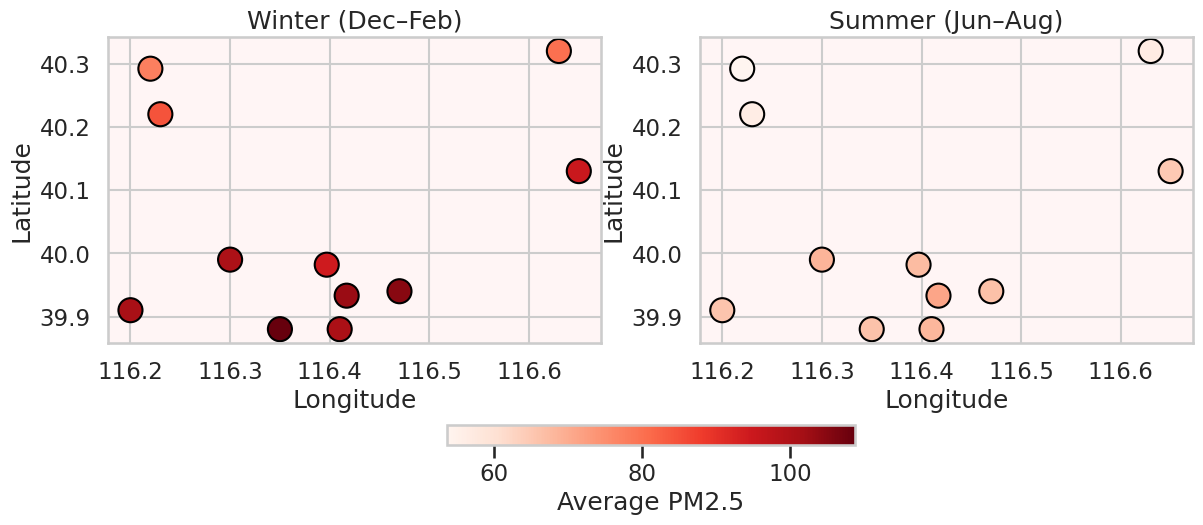

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
# WINTER
sc = axes[0].scatter(
    winter_map['lon'],
    winter_map['lat'],
    c=winter_map['PM2.5'],
    cmap='Reds',
    s=300,
    edgecolor='black',
    vmin=vmin,
    vmax=vmax
)

axes[0].set_title('Winter (Dec–Feb)')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# SUMMER
axes[1].scatter(
    summer_map['lon'],
    summer_map['lat'],
    c=summer_map['PM2.5'],
    cmap='Reds',
    s=300,
    edgecolor='black',
    vmin=vmin,
    vmax=vmax
)

axes[1].set_title('Summer (Jun–Aug)')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.subplots_adjust(bottom=0.20)

cbar = fig.colorbar(
    sc,
    ax=axes,
    orientation='horizontal',
    fraction=0.05,
    pad=0.20
)

cbar.set_label('Average PM2.5')

plt.show()


In [ ]:
delta_map = winter_map.copy()
delta_map['PM2.5_diff'] = winter_map['PM2.5'] - summer_map['PM2.5']

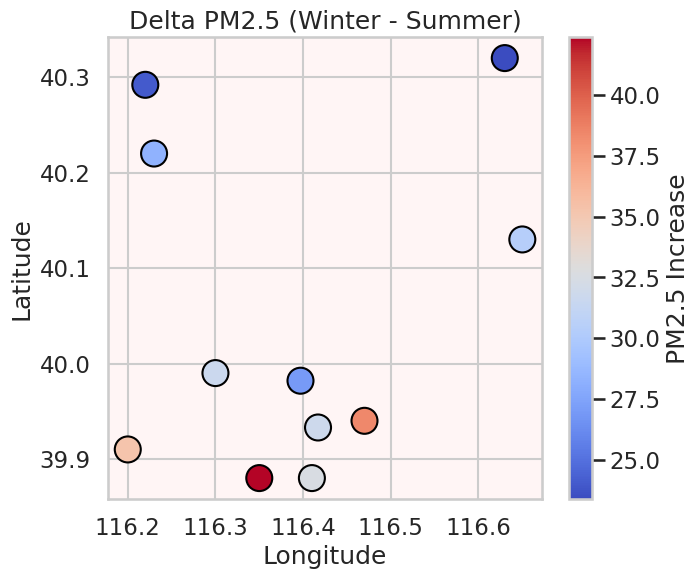

In [ ]:
fig, ax = plt.subplots(figsize=(7,6))

sc = ax.scatter(
    delta_map['lon'],
    delta_map['lat'],
    c=delta_map['PM2.5_diff'],
    cmap='coolwarm',
    s=350,
    edgecolor='black'
)

ax.set_title('Delta PM2.5 (Winter - Summer)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

cbar = plt.colorbar(sc)
cbar.set_label('PM2.5 Increase')

plt.show()

Colormap coolwarm:

🔵 Biru → nilai relatif lebih rendah dalam range

⚪ Putih → tengah

🔴 Merah → nilai relatif lebih tinggi dalam range

**INSIGHT:**

Delta map membuktikan bahwa:

*    Polusi musim dingin adalah fenomena sistemik
*    Namun tingkat keparahannya berbeda antar wilayah
*    Wilayah pusat kota lebih rentan terhadap akumulasi polutan musiman

In [ ]:
delta_map['risk_level'] = pd.qcut(
    delta_map['PM2.5_diff'],
    q=3,
    labels=['Low','Medium','High']
)

In [ ]:
delta_map[['station','PM2.5_diff','risk_level']].sort_values('PM2.5_diff', ascending=False)

,station,PM2.5_diff,risk_level
10,Wanshouxigong,42.374492,High
6,Nongzhanguan,38.426518,High
4,Gucheng,35.319189,High
8,Tiantan,32.575600,High
3,Dongsi,31.836902,Medium
9,Wanliu,31.685027,Medium
7,Shunyi,30.430727,Medium
1,Changping,28.352014,Low
0,Aotizhongxin,27.000914,Low
2,Dingling,23.998509,Low


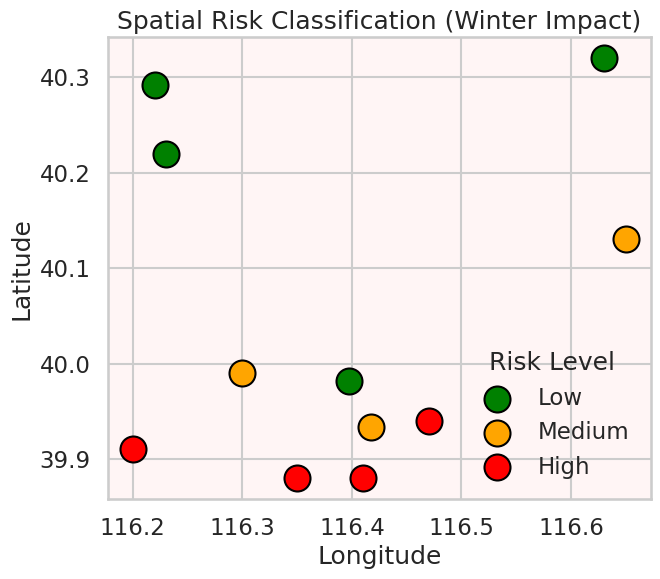

In [ ]:
color_dict = {
    'Low': 'green',
    'Medium': 'orange',
    'High': 'red'
}

fig, ax = plt.subplots(figsize=(7,6))

for level in delta_map['risk_level'].unique():
    subset = delta_map[delta_map['risk_level'] == level]
    ax.scatter(
        subset['lon'],
        subset['lat'],
        color=color_dict[level],
        s=350,
        edgecolor='black',
        label=level
    )

ax.set_title('Spatial Risk Classification (Winter Impact)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(title='Risk Level')
plt.show()

In [ ]:
delta_map.groupby('risk_level')['PM2.5_diff'].agg(['mean','min','max'])

/tmp/ipython-input-1107731472.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delta_map.groupby('risk_level')['PM2.5_diff'].agg(['mean','min','max'])


,mean,min,max
risk_level,,,
Low,25.684984,23.388497,28.352014
Medium,31.317552,30.430727,31.836902
High,37.173950,32.575600,42.374492


**Insight:**

* Ada heterogenitas spasial yang nyata
* Dampak winter signifikan dan berbeda antar wilayah
* Area urban core lebih rentan terhadap lonjakan musiman

## Conclusion

Penarikan kesimpulan dengan melihat latar belakang bahwa Beijing dikenal sebagai salah satu kota dengan tingkat polusi udara tinggi, episode smog berat, dan implementasi kebijakan pengendalian emisi sejak 2013. Kebijakan tersebut bertujuan menurunkan konsentrasi partikulat halus (PM2.5) yang berdampak langsung pada kesehatan masyarakat.

Analisis ini menjawab empat pertanyaan utama terkait efektivitas kebijakan, pola musiman, pengaruh meteorologi, dan perbedaan spasial antar wilayah.


- ***Conclution pertanyaan 1 : Tren Tahunan***

Dari tren rata-rata tahunan yang diperoleh, ada penurunan bertahap hingga 2016 tetapi pada 2017 terjadi lonjakan signifikan. Artinya, kebijakan kemungkinan memberi dampak awal (2014–2016), tetapi efeknya tidak konsisten dalam jangka panjang.

- ***Conclution pertanyaan 2 : SMOG Tertinggi***

Dari analisis bulanan dan heatmap ditemui bahwa konsentrasi tertinggi PM2.5 terjadi pada Desember–Februari dan terendah pada Agustus. Selanjutnya, pola ini konsisten setiap tahun. Artinya, faktor pembakaran pemanas, stabilitas atmosfer, dan minimnya dispersi angin berperan besar.

- ***Conclution pertanyaan 3 : Hubungan Meteorologi dengan PM2.5***

Dari korelasi dan scatterplot diperoleh faktor paling berpengaruh yaitu kecepatan angin (WSPM). Artinya, kondisi atmosfer dan sirkulasi udara memiliki peran penting dalam pembentukan smog.

- ***Conclution pertanyaan 4 : Perbedaan Antar Wilayah (Spasial)***

Diperoleh dari visualisasi bahwa selisih antar station sekitar ±19 dengan wilayah pusat kota cenderung lebih tinggi dan wilayah pinggiran kota relatif lebih rendah. Artinya, masalah polusi bersifat kota-wide, bukan hanya lokal di satu wilayah.

***REKOMENDASI Berdasarkan EDA:***

*   Fokus pada Musim Dingin : Regulasi tambahan saat periode Des - Feb; Pembatasan industri sementara; Pengawasan emisi pemanas domestik

*   Kebijakan Adaptif Berbasis Cuaca dikarenalam WSPM berpengaruh besar: Menggunakan early warning system berbasis prediksi angin; menerapkan pembatasan lalu lintas saat angin rendah

*   Perlu Pendekatan Kota-Wide: kebijakan tidak cukup hanya lokal dan harus menyasar seluruh metropolitan

*   Monitoring Berkelanjutan karena lonjakan 2017 menunjukkan: evaluasi kebijakan harus periodik; masih perlu adaptasi strategi jangka panjang


### PERSIAPAN MAIN_DATA UNTUK STREAMLIT

In [ ]:
columns_to_drop = ['day', 'PM10', 'S02', 'NO2', 'CO', 'O3','wd','day_name']

existing_columns_to_drop = [col for col in columns_to_drop if col in df_air.columns]

if existing_columns_to_drop:
    df_air.drop(existing_columns_to_drop, axis=1, inplace=True)
    print(f"Kolom {existing_columns_to_drop} berhasil dihapus.")
else:
    print("Tidak ada kolom yang ditentukan untuk dihapus ditemukan di DataFrame.")

Tidak ada kolom yang ditentukan untuk dihapus ditemukan di DataFrame.


In [ ]:
df_air = df_air.merge(station_coords, on='station', how='left')

In [ ]:
df_air.columns

Index(['year', 'month', 'hour', 'PM2.5', 'SO2', 'TEMP', 'PRES', 'DEWP', 'RAIN',
       'WSPM', 'station', 'datetime', 'day_type', 'lat', 'lon'],
      dtype='object')

In [ ]:
df_air.to_parquet(
    "main_data.parquet",
    engine="pyarrow",
    compression=None,
    index=False
)

In [ ]:
pd.read_parquet("main_data.parquet")

,year,month,hour,PM2.5,SO2,TEMP,PRES,DEWP,RAIN,WSPM,station,datetime,day_type,lat,lon
0,2013,3,0,4.000000,4.000000,-0.700000,1023.000000,-18.800000,0.000000,4.400000,Aotizhongxin,2013-03-01 00:00:00,Weekday,39.982000,116.397000
1,2013,3,1,8.000000,4.000000,-1.100000,1023.200000,-18.200000,0.000000,4.700000,Aotizhongxin,2013-03-01 01:00:00,Weekday,39.982000,116.397000
2,2013,3,2,7.000000,5.000000,-1.100000,1023.500000,-18.200000,0.000000,5.600000,Aotizhongxin,2013-03-01 02:00:00,Weekday,39.982000,116.397000
3,2013,3,3,6.000000,11.000000,-1.400000,1024.500000,-19.400000,0.000000,3.100000,Aotizhongxin,2013-03-01 03:00:00,Weekday,39.982000,116.397000
4,2013,3,4,3.000000,12.000000,-2.000000,1025.200000,-19.500000,0.000000,2.000000,Aotizhongxin,2013-03-01 04:00:00,Weekday,39.982000,116.397000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017,2,19,11.000000,3.000000,12.500000,1013.500000,-16.200000,0.000000,2.400000,Wanshouxigong,2017-02-28 19:00:00,Weekday,39.880000,116.350000
420764,2017,2,20,13.000000,3.000000,11.600000,1013.600000,-15.100000,0.000000,0.900000,Wanshouxigong,2017-02-28 20:00:00,Weekday,39.880000,116.350000
420765,2017,2,21,14.000000,4.000000,10.800000,1014.200000,-13.300000,0.000000,1.100000,Wanshouxigong,2017-02-28 21:00:00,Weekday,39.880000,116.350000
420766,2017,2,22,12.000000,4.000000,10.500000,1014.400000,-12.900000,0.000000,1.200000,Wanshouxigong,2017-02-28 22:00:00,Weekday,39.880000,116.350000


In [ ]:
from google.colab import files

files.download('main_data.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>